## scikit-learn

## (1) Linear regression
Here we use scikit-learn to solve a linear regression problem
<a id='scikit-learn'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit

Let's first create a dataset:

In [2]:
def f(x, m, b):
    return m * x + b

In [3]:
npoints = 100
dmax = 10

x = np.linspace(0, 99, npoints).reshape(-1, 1) # x needs to be a 2D array
m = 2.0
b = 5.0
y_data = f(x, m, b).flatten() + np.random.randn(npoints) * dmax 
y_orig = f(x, m, b).flatten()

Let's first plot the data and have a look

TRAIN: [53 92 78 13  7 30 22 24 33  8 43 62  3 71 45 48  6 99 82 76 60 80 90 68
 51 27 18 56 63 74  1 61 42 41  4 15 17 40 38  5 91 59  0 34 28 50 11 35
 23 52 10 31 66 57 79 85 32 84 14 89 19 29 49 97 98 69 20 94 72 77 25 37
 81 46 39 65 58 12 88 70 87 36 21 83  9 96 67 64 47 44]
TEST: [26 86  2 55 75 93 16 73 54 95]


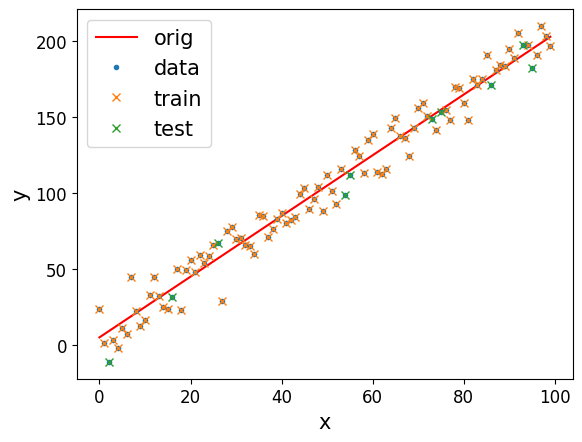

In [4]:
rs = ShuffleSplit(n_splits=1, test_size=.1, random_state=0)

for train, test in rs.split(x):
    print(f"TRAIN: {train}")
    print(f"TEST: {test}")
    
    plt.plot(x[:,0], y_orig, c='red', label='orig')
    plt.plot(x[:,0], y_data, '.', label = 'data')
    plt.plot(x[train],y_data[train], 'x', label = 'train')
    plt.plot(x[test],y_data[test], 'x', label = 'test')
    plt.legend(fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [5]:
# fit the data with a linear regression model:

reg = linear_model.LinearRegression()
reg.fit(x[train],y_data[train])   
m_fit = reg.coef_[0]         
b_fit = reg.intercept_         

print(f'Fitted slope = {m_fit:5.3f}')
print(f'Fitted intercept = {b_fit:5.3f}')

Fitted slope = 2.020
Fitted intercept = 4.511


Compute y values predicted by the model and plot

In [6]:
y_pred_all = reg.predict(x)         
y_pred_test = reg.predict(x[test])
y_pred_train = reg.predict(x[train])

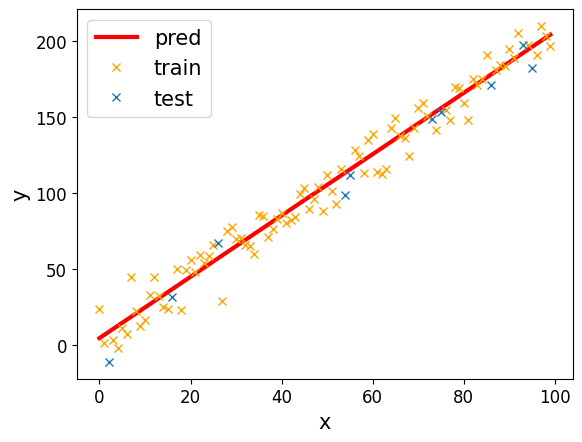

In [7]:
plt.plot(x,y_pred_all, c='red', label='pred', lw=3)
plt.plot(x[train],y_data[train],'x', c='orange', label = 'train')
plt.plot(x[test],y_data[test], 'x', label = 'test')
plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('linear_regression-01.pdf', bbox_inches='tight')
plt.show()

In [8]:
# get coefficient of determination R^2 

r2 = r2_score(y_data[test],y_pred_test)

print(f'R2 score = {r2:8.5f}')

R2 score =  0.97567


In [9]:
# get mean squared error and mean absolute error of test and training set

mse_test = mean_squared_error(y_data[test],y_pred_test)
mse_train = mean_squared_error(y_data[train],y_pred_train)

mae_test = mean_absolute_error(y_data[test],y_pred_test)
mae_train = mean_absolute_error(y_data[train],y_pred_train)

print(f'MSE test  = {mse_test:8.5f}    MAE test  = {mae_test:8.5f}')
print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')

MSE test  = 103.69898    MAE test  =  8.50904
MSE train = 104.80457     MAE train =  8.39674


## (2) Using the diabetes dataset

In [10]:
from sklearn import datasets

In [11]:
# load diabetes dataset (all data have been mean centered and scaled by the standard deviation times n_samples)

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


Analysing data for high-density lipoproteins:



Text(0, 0.5, 'Regression Target')

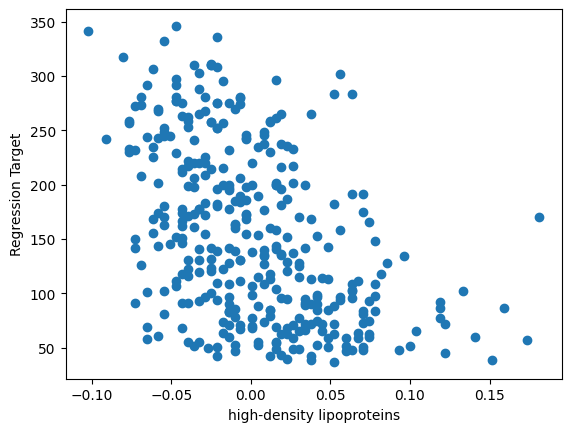

In [74]:
# pick a certain column
xcol=['age','sex','body mass index','average blood pressure','total serum cholesterol','low-density lipoproteins','high-density lipoproteins','total cholesterol/HDL','serum triglycerides level','blood surgar level']

col = 6
data_x = diabetes_X[:,col]
data_y = diabetes_y
ndata = len(data_x)

print('\nAnalysing data for %s:\n' % xcol[col])

# randomly assign 80% of the data to the training set and the remaining 20% to the test set
train_indices, test_indices = list(ShuffleSplit(n_splits = 1, train_size = 0.8, test_size=0.2).split(diabetes_X, diabetes_y))[0]
train_x, train_y = diabetes_X[train_indices], diabetes_y[train_indices]
test_x, test_y = diabetes_X[test_indices], diabetes_y[test_indices]
# plot the data
# diabetes_y.shape
train_x[:, 6].shape
plt.scatter(train_x[:, col], train_y)
plt.xlabel(f"{xcol[col]}")
plt.ylabel("Regression Target")


Mean squared error: 5.67E+03
Mean absolute error: 64.94
$r^2$ Error Score: -0.22


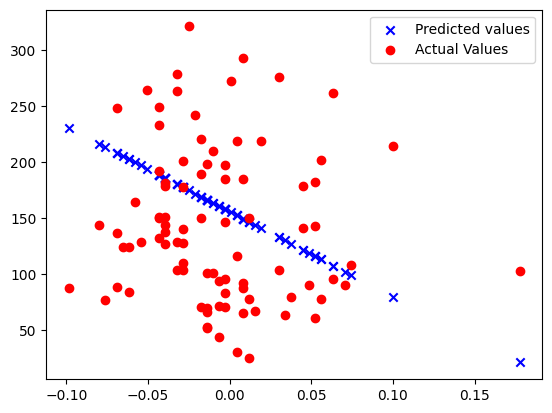

In [92]:
# fit the data using linear regression within scikit-learn
model = linear_model.LinearRegression()
model.fit(train_x[:, col].reshape(-1, 1), train_y)



# compute y-values predicted by the model
prediction = model.predict(test_x[:, col].reshape(-1, 1))



# plot predicted values together with training and test data
plt.scatter(test_x[:, col], prediction, marker='x', c='b', label='Predicted values')
plt.scatter(test_x[:, col], test_y, c='r', label='Actual Values')
plt.legend()



# get R2, MSE, and MAE

print(f"Mean squared error: {mean_squared_error(test_y, prediction):.2E}")
print(f"Mean absolute error: {mean_absolute_error(test_y, prediction):.2f}")
print(fr"$r^2$ Error Score: {r2_score(test_y, prediction):.2f}")